In [65]:
# open the excel file on 22-23 Stats sheet as a pandas dataframe
# read the data from the sheet

import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# open the excel file
wb = openpyxl.load_workbook('/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/cleaning_copy_excel/on_college_2012-/2012-2022 college_enrolment_headcount.xlsx')

In [66]:
gender_sheet = wb['Gender']

gender_data = gender_sheet.values

# convert to dataframe, first row is a header as it's column names
cols = next(gender_data)
gender_df = pd.DataFrame(gender_data, columns=cols)

In [67]:
# replace instances of * in Headcount with 0
gender_df['Headcount Full-Time Fall'] = gender_df['Headcount Full-Time Fall'].replace('*', 5)

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_77687/3018326197.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_df['Headcount Full-Time Fall'] = gender_df['Headcount Full-Time Fall'].replace('*', 5)


In [68]:
gender_df

,College Name,Fiscal Year,Gender Description,Headcount Full-Time Fall,Total FT Enrolment 22-23,% Female 22-23
0,Algonquin College,2012-2013,Female,7537,NaN,NaN
1,Algonquin College,2012-2013,Male,8492,NaN,NaN
2,Algonquin College,2012-2013,Undisclosed,39,NaN,NaN
3,Algonquin College,2013-2014,Female,8036,NaN,NaN
4,Algonquin College,2013-2014,Male,8756,NaN,NaN
...,...,...,...,...,...,...
790,St. Lawrence College,2021-2022,Undisclosed,33,NaN,NaN
791,St. Lawrence College,2022-2023,Female,5668,NaN,NaN
792,St. Lawrence College,2022-2023,Identify in another way,46,NaN,NaN
793,St. Lawrence College,2022-2023,Male,5475,NaN,NaN


In [69]:
# Remove the '20' prefix from the fiscal year entries
gender_df['Fiscal Year'] = gender_df['Fiscal Year'].apply(lambda x: f"{x[2:4]}-{x[7:]}") # this is a lambda function that takes the third and fourth characters and the last two characters of the string

# Display the updated DataFrame to verify the change
print(gender_df[['Fiscal Year']].head())

  Fiscal Year
0       12-13
1       12-13
2       12-13
3       13-14
4       13-14


In [70]:
# drop the columns that were added in Excel as we can add them more comprehensively in the notebook
# drop total FT Enrolment 22-23
gender_df.drop(['Total FT Enrolment 22-23', '% Female 22-23'], axis=1, inplace=True)

In [71]:
gender_df

,College Name,Fiscal Year,Gender Description,Headcount Full-Time Fall
0,Algonquin College,12-13,Female,7537
1,Algonquin College,12-13,Male,8492
2,Algonquin College,12-13,Undisclosed,39
3,Algonquin College,13-14,Female,8036
4,Algonquin College,13-14,Male,8756
...,...,...,...,...
790,St. Lawrence College,21-22,Undisclosed,33
791,St. Lawrence College,22-23,Female,5668
792,St. Lawrence College,22-23,Identify in another way,46
793,St. Lawrence College,22-23,Male,5475


In [72]:
# add a column that displays the total headcount in that year for each college
gender_df["School's Total Headcount This Year"] = gender_df.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].transform('sum')

In [73]:
gender_df

,College Name,Fiscal Year,Gender Description,Headcount Full-Time Fall,School's Total Headcount This Year
0,Algonquin College,12-13,Female,7537,16068
1,Algonquin College,12-13,Male,8492,16068
2,Algonquin College,12-13,Undisclosed,39,16068
3,Algonquin College,13-14,Female,8036,16844
4,Algonquin College,13-14,Male,8756,16844
...,...,...,...,...,...
790,St. Lawrence College,21-22,Undisclosed,33,9037
791,St. Lawrence College,22-23,Female,5668,11244
792,St. Lawrence College,22-23,Identify in another way,46,11244
793,St. Lawrence College,22-23,Male,5475,11244


Now I have the school's total headcount for each year, I will calculate a share of the student headcount that each school has

In [74]:
# New column which divides Headcount Full-Time Fall by School's Total Headcount This Year
gender_df['Gender Share of Headcount'] = round((gender_df['Headcount Full-Time Fall'] / gender_df["School's Total Headcount This Year"]) * 100, 2)

In [75]:
gender_df

,College Name,Fiscal Year,Gender Description,Headcount Full-Time Fall,School's Total Headcount This Year,Gender Share of Headcount
0,Algonquin College,12-13,Female,7537,16068,46.91
1,Algonquin College,12-13,Male,8492,16068,52.85
2,Algonquin College,12-13,Undisclosed,39,16068,0.24
3,Algonquin College,13-14,Female,8036,16844,47.71
4,Algonquin College,13-14,Male,8756,16844,51.98
...,...,...,...,...,...,...
790,St. Lawrence College,21-22,Undisclosed,33,9037,0.37
791,St. Lawrence College,22-23,Female,5668,11244,50.41
792,St. Lawrence College,22-23,Identify in another way,46,11244,0.41
793,St. Lawrence College,22-23,Male,5475,11244,48.69


## Pivoting the Dataframe

I'd like each record to be one PSI in one Fiscal Year, with the genders as columns and their share of the student headcount.
This will be useful in more easily tracking changes over time to the college's student headcount composition in the gender realm and programs, credentials etc etc...

In [76]:
# pivot the table to get each gender's headcount share as columns

gender_df_pivot = gender_df.pivot_table(
    index=['College Name', 'Fiscal Year', "School's Total Headcount This Year"], # setting the index specifies which columns to keep as is
    columns = 'Gender Description', # this is the record dataa we will transform into column data
    values = 'Gender Share of Headcount' # this is the data we will use to fill the new columns of Gender Description, once we've renamed to Share of the Headcount
).reset_index()

In [77]:
gender_df_pivot.columns

Index(['College Name', 'Fiscal Year', 'School's Total Headcount This Year',
       'Female', 'Identify in another way', 'Male',
       'Not Available or Not Applicable', 'Undisclosed'],
      dtype='object', name='Gender Description')

In [78]:
# Rename the columns
gender_df_pivot.rename(columns={
    'Female': 'Female % of Headcount',
    'Identify in another way': 'Other Gender % of Headcount',
    'Male': 'Male % of Headcount',
    'Not Available or Not Applicable': 'Not Applicable % of Headcount',
    'Undisclosed': 'Undisclosed % of Headcount',
}, inplace=True)

In [79]:
# remove the column name Gender Description
gender_df_pivot.columns.name = None

In [80]:
gender_df_pivot

,College Name,Fiscal Year,School's Total Headcount This Year,Female % of Headcount,Other Gender % of Headcount,Male % of Headcount,Not Applicable % of Headcount,Undisclosed % of Headcount
0,Algonquin College,12-13,16068,46.91,NaN,52.85,NaN,0.24
1,Algonquin College,13-14,16844,47.71,NaN,51.98,NaN,0.31
2,Algonquin College,14-15,17025,47.92,NaN,51.78,NaN,0.31
3,Algonquin College,15-16,17435,48.74,NaN,51.26,NaN,0.00
4,Algonquin College,16-17,17389,48.35,NaN,51.62,NaN,0.03
...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8795,52.22,0.19,47.58,NaN,0.00
260,St. Lawrence College,19-20,9014,52.41,0.21,47.38,NaN,NaN
261,St. Lawrence College,20-21,9225,52.48,0.25,47.22,NaN,0.05
262,St. Lawrence College,21-22,9037,53.30,0.34,45.99,NaN,0.37


I'll now overwrite the gender_df with the pivoted version

In [81]:
gender_df = gender_df_pivot

In [82]:
gender_df

,College Name,Fiscal Year,School's Total Headcount This Year,Female % of Headcount,Other Gender % of Headcount,Male % of Headcount,Not Applicable % of Headcount,Undisclosed % of Headcount
0,Algonquin College,12-13,16068,46.91,NaN,52.85,NaN,0.24
1,Algonquin College,13-14,16844,47.71,NaN,51.98,NaN,0.31
2,Algonquin College,14-15,17025,47.92,NaN,51.78,NaN,0.31
3,Algonquin College,15-16,17435,48.74,NaN,51.26,NaN,0.00
4,Algonquin College,16-17,17389,48.35,NaN,51.62,NaN,0.03
...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8795,52.22,0.19,47.58,NaN,0.00
260,St. Lawrence College,19-20,9014,52.41,0.21,47.38,NaN,NaN
261,St. Lawrence College,20-21,9225,52.48,0.25,47.22,NaN,0.05
262,St. Lawrence College,21-22,9037,53.30,0.34,45.99,NaN,0.37


### Dealing with Null values (**please see note in markdown immediately below**)

**Note for Other Gender %**: There are many instances where individual colleges in the MCU data did not have an option for anything other than Male or Female until later in the dataset timeline, around 2016-2018 or even later. This is likely the source of many of the null figures in 'Other Gender % of Headcount' which may also be manifesting in the Undisclosed category which has more non-zero entries. 

Therefore **data for earlier Fiscal Year Other Gender % share is very likely not zero**, although I will be filling null values as zero in this dataframe.

I will check out the numbers on Not Applicable and Undisclosed and potentially drop them to leave only Male Female and Other as share of headcount.

In [83]:
# check isna values
gender_df.isna().sum()

College Name                            0
Fiscal Year                             0
School's Total Headcount This Year      0
Female % of Headcount                   0
Other Gender % of Headcount           212
Male % of Headcount                     0
Not Applicable % of Headcount         263
Undisclosed % of Headcount             50
dtype: int64

only one record has anything for Not Applicable - Drop

In [84]:
# drop Not Applicable % of Headcount
gender_df.drop('Not Applicable % of Headcount', axis=1, inplace=True)

In [85]:
gender_df

,College Name,Fiscal Year,School's Total Headcount This Year,Female % of Headcount,Other Gender % of Headcount,Male % of Headcount,Undisclosed % of Headcount
0,Algonquin College,12-13,16068,46.91,NaN,52.85,0.24
1,Algonquin College,13-14,16844,47.71,NaN,51.98,0.31
2,Algonquin College,14-15,17025,47.92,NaN,51.78,0.31
3,Algonquin College,15-16,17435,48.74,NaN,51.26,0.00
4,Algonquin College,16-17,17389,48.35,NaN,51.62,0.03
...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8795,52.22,0.19,47.58,0.00
260,St. Lawrence College,19-20,9014,52.41,0.21,47.38,NaN
261,St. Lawrence College,20-21,9225,52.48,0.25,47.22,0.05
262,St. Lawrence College,21-22,9037,53.30,0.34,45.99,0.37


In [86]:
# fill na values with 0
gender_df.fillna(0, inplace=True)

## EDA

Have gender compositions changed much in 10-12 years?

In [88]:
gender_df[gender_df['College Name'] == 'Conestoga College']

,College Name,Fiscal Year,School's Total Headcount This Year,Female % of Headcount,Other Gender % of Headcount,Male % of Headcount,Undisclosed % of Headcount
55,Conestoga College,12-13,10461,48.50,0.00,51.50,0.00
56,Conestoga College,13-14,10806,47.95,0.00,52.05,0.00
57,Conestoga College,14-15,11004,47.40,0.00,52.60,0.00
58,Conestoga College,15-16,11492,48.10,0.00,51.90,0.00
59,Conestoga College,16-17,11655,47.57,0.00,52.39,0.04
60,Conestoga College,17-18,12548,47.08,0.04,52.85,0.04
61,Conestoga College,18-19,15390,44.57,0.03,55.36,0.03
62,Conestoga College,19-20,16944,44.20,0.03,55.74,0.03
63,Conestoga College,20-21,18157,45.66,0.06,54.19,0.09
64,Conestoga College,21-22,22532,44.75,0.12,55.07,0.06


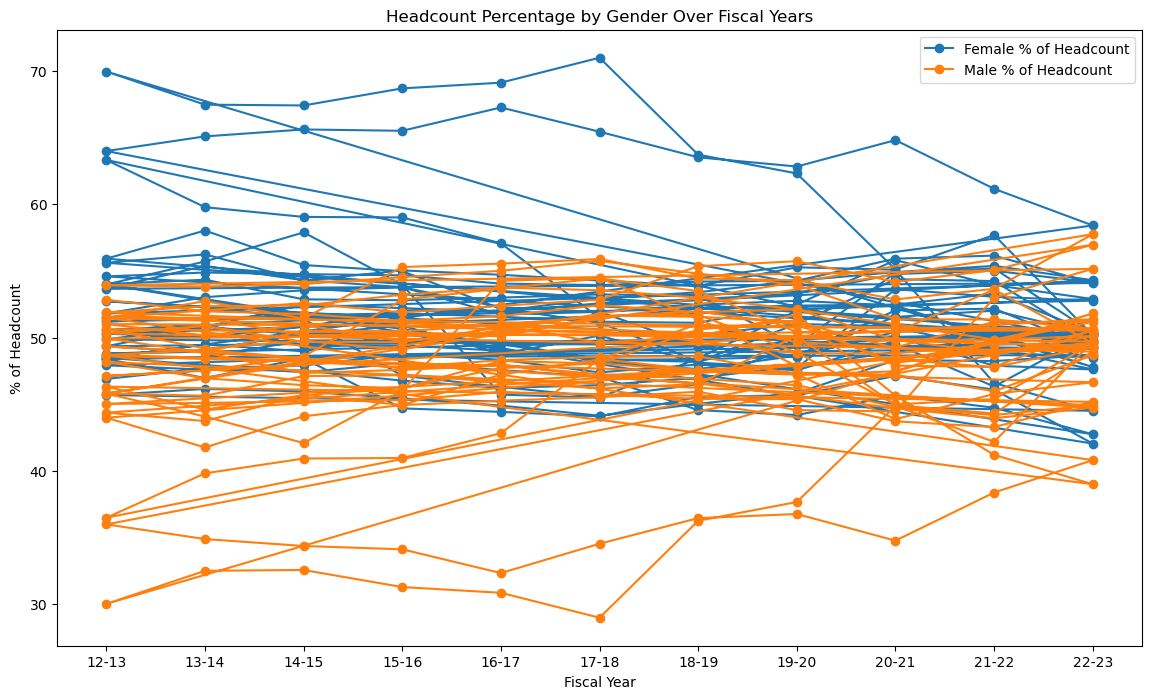

In [89]:
# plot the Male and Female % of headcount against each other on y axis, and the fiscal year on the x axis
# for each college

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Plot Female % of Headcount
plt.plot(gender_df['Fiscal Year'], gender_df['Female % of Headcount'], label='Female % of Headcount', marker='o')

# Plot Male % of Headcount
plt.plot(gender_df['Fiscal Year'], gender_df['Male % of Headcount'], label='Male % of Headcount', marker='o')

# Adding labels and title
plt.xlabel('Fiscal Year')
plt.ylabel('% of Headcount')
plt.title('Headcount Percentage by Gender Over Fiscal Years')

# Show legend to differentiate between Male and Female lines
plt.legend()

# Display the plot
plt.show()

Above: It's super messy, all we can really see is that the schools with a more extreme split (e.g. the 29% male and 71% Female) have equalized and the male share seems to be increasing in Colleges.

Let's clean it up - split male from female, deal with half the schools at a time so the graph is legible.

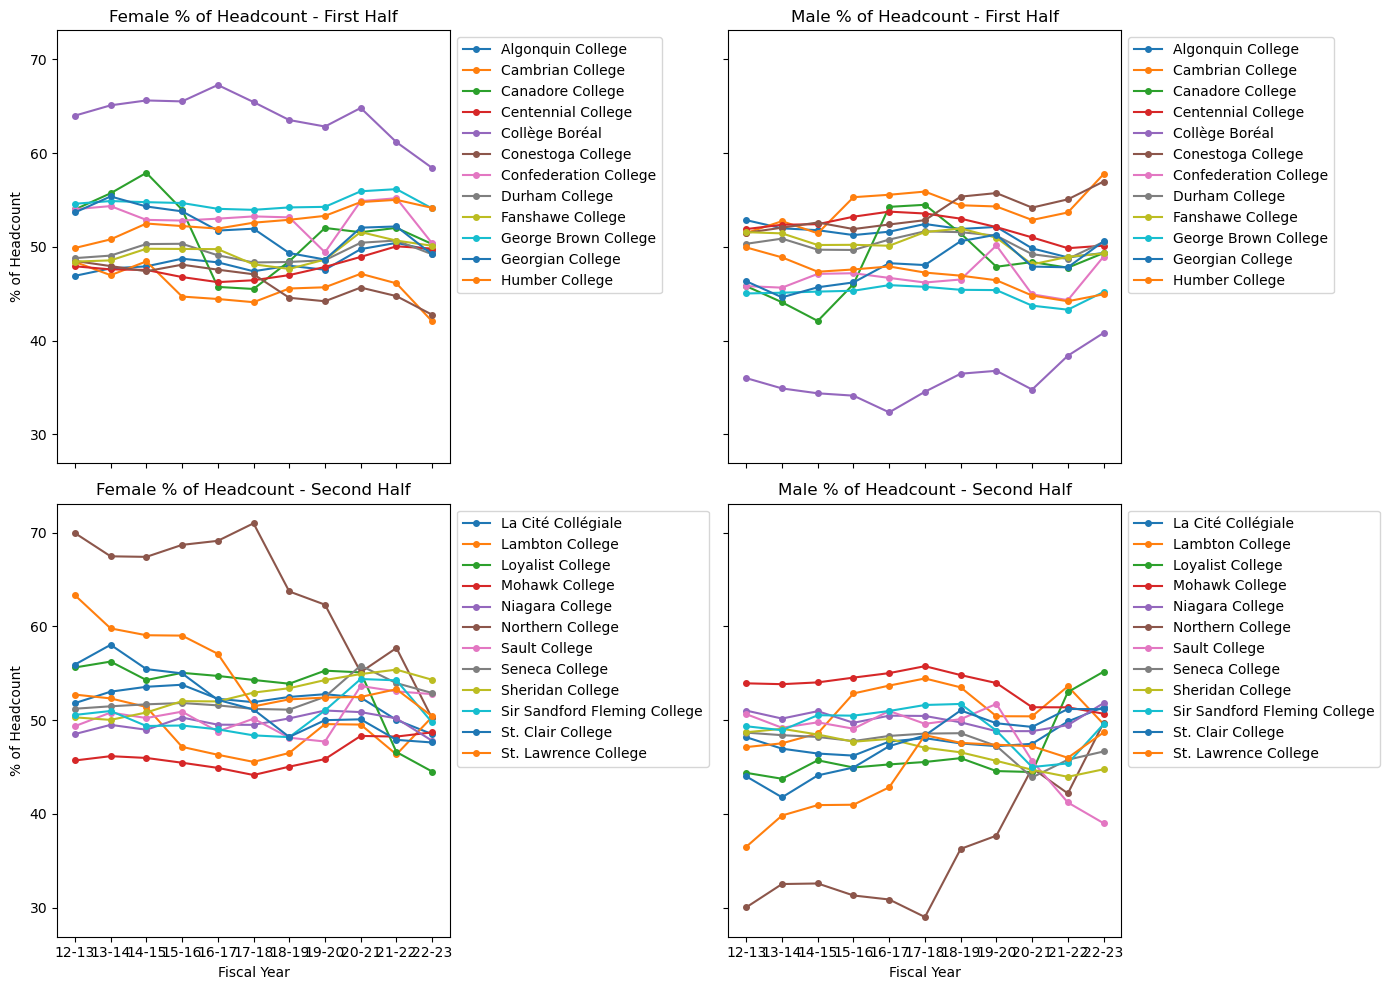

In [ ]:
# Get the unique colleges and split them into two halves
colleges = gender_df['College Name'].unique()
half_index = len(colleges) // 2
colleges_first_half = colleges[:half_index] # index up to the half way point
colleges_second_half = colleges[half_index:] # index from the half way point to the end

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True) # sharex and sharey make sure all subplots have the same x and y axis

# First plot: First half of colleges, Female % of Headcount
for college in colleges_first_half:
    college_data = gender_df[gender_df['College Name'] == college]
    axes[0, 0].plot(
        college_data['Fiscal Year'],
        college_data['Female % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[0, 0].set_title('Female % of Headcount - First Half')
axes[0, 0].set_ylabel('% of Headcount')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Second plot: First half of colleges, Male % of Headcount
for college in colleges_first_half:
    college_data = gender_df[gender_df['College Name'] == college]
    axes[0, 1].plot(
        college_data['Fiscal Year'],
        college_data['Male % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[0, 1].set_title('Male % of Headcount - First Half')
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Third plot: Second half of colleges, Female % of Headcount
for college in colleges_second_half:
    college_data = gender_df[gender_df['College Name'] == college]
    axes[1, 0].plot(
        college_data['Fiscal Year'],
        college_data['Female % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[1, 0].set_title('Female % of Headcount - Second Half')
axes[1, 0].set_xlabel('Fiscal Year')
axes[1, 0].set_ylabel('% of Headcount')
axes[1, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Fourth plot: Second half of colleges, Male % of Headcount
for college in colleges_second_half:
    college_data = gender_df[gender_df['College Name'] == college]
    axes[1, 1].plot(
        college_data['Fiscal Year'],
        college_data['Male % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[1, 1].set_title('Male % of Headcount - Second Half')
axes[1, 1].set_xlabel('Fiscal Year')
axes[1, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()